# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Automated Anomaly Detection using Z-score method

**Steps**:
1. Data Set: Download a dataset representing daily sales figures for a retail store.
2. Calculate Z-score: Compute the mean and standard deviation of the sales. Use these to
calculate the Z-score for each day's sales figure.
3. Identify Anomalies: Detect anomalies by identifying values with a Z-score above 3 or below -3.
4. Visualize: Plot a graph to visualize anomalies.

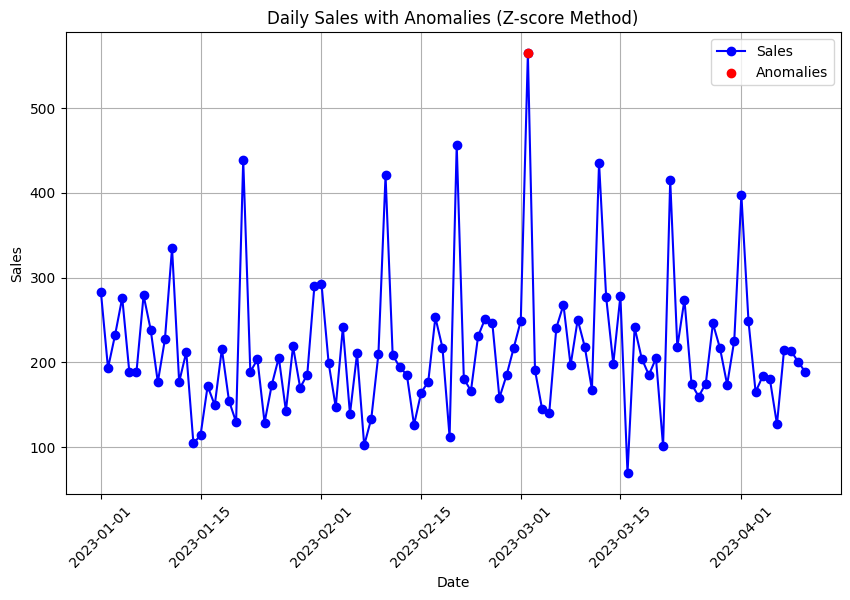

Detected Anomalies:
         Date       Sales  Z-Score  Anomaly
60 2023-03-02  564.659878  4.30833  Anomaly


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data():
    """
    Simulates loading sales data (replace with pd.read_csv() in real-world cases).
    Ensures data integrity and handles missing or non-numeric values.
    """
    try:
        # Simulated sales data (replace this with actual data loading in practice)
        np.random.seed(42)
        dates = pd.date_range('2023-01-01', periods=100, freq='D')
        sales = np.random.normal(loc=200, scale=50, size=100)
        sales[::10] = sales[::10] + np.random.normal(loc=200, scale=100, size=10)  # Add anomalies
        
        # Create DataFrame
        df = pd.DataFrame({'Date': dates, 'Sales': sales})

        # Step 1: Handle missing values (drop rows with NaN values)
        df.dropna(inplace=True)

        # Step 2: Ensure all sales data is numeric, coerce errors to NaN and drop rows if needed
        df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
        df.dropna(inplace=True)

        # Step 3: Ensure there are sufficient data points
        if df.empty:
            raise ValueError("Dataset is empty after handling missing or non-numeric values.")
        
        return df

    except Exception as e:
        print(f"Error loading data: {e}")
        sys.exit(1)

def detect_anomalies(df):
    """
    Detect anomalies using the Z-score method.
    """
    try:
        # Calculate Z-score for each day's sales
        mean_sales = df['Sales'].mean()
        std_sales = df['Sales'].std()
        df['Z-Score'] = (df['Sales'] - mean_sales) / std_sales

        # Identify anomalies (Z-score > 3 or Z-score < -3)
        df['Anomaly'] = np.where((df['Z-Score'] > 3) | (df['Z-Score'] < -3), 'Anomaly', 'Normal')

        return df

    except Exception as e:
        print(f"Error in anomaly detection: {e}")
        sys.exit(1)

def visualize_anomalies(df):
    """
    Visualize the anomalies in the sales data.
    """
    try:
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(df['Date'], df['Sales'], label='Sales', color='blue', marker='o')

        # Highlight anomalies
        anomalies = df[df['Anomaly'] == 'Anomaly']
        plt.scatter(anomalies['Date'], anomalies['Sales'], color='red', label='Anomalies', zorder=5)

        plt.title('Daily Sales with Anomalies (Z-score Method)')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error in visualization: {e}")
        sys.exit(1)

def main():
    """
    Main function to execute the anomaly detection process.
    """
    # Step 1: Load Data
    df = load_data()

    # Step 2: Apply Anomaly Detection
    df = detect_anomalies(df)

    # Step 3: Visualize the Results
    visualize_anomalies(df)

    # Step 4: Display Anomaly Counts
    print("Detected Anomalies:")
    print(df[df['Anomaly'] == 'Anomaly'])

# Run the main function
if __name__ == "__main__":
    main()